In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('brain_stroke.csv') # Load dataset

In [12]:
df.info() #Melihat info dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


Preprocessing

In [14]:
#melihat duplikasi data
df.duplicated().sum()

np.int64(0)

In [15]:
#melihat data yang kosong
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
df['stroke'].value_counts() # Menampilkan jumlah nilai dari kelas 1 dan 0

stroke
0    4733
1     248
Name: count, dtype: int64

In [17]:
#membuat plot bar dari distribusi nilai LUNG_CANCER dalam sebuah kolom tertentu dari DataFrame.
def plot(col, df=df):
    return df.groupby(col)['stoke'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

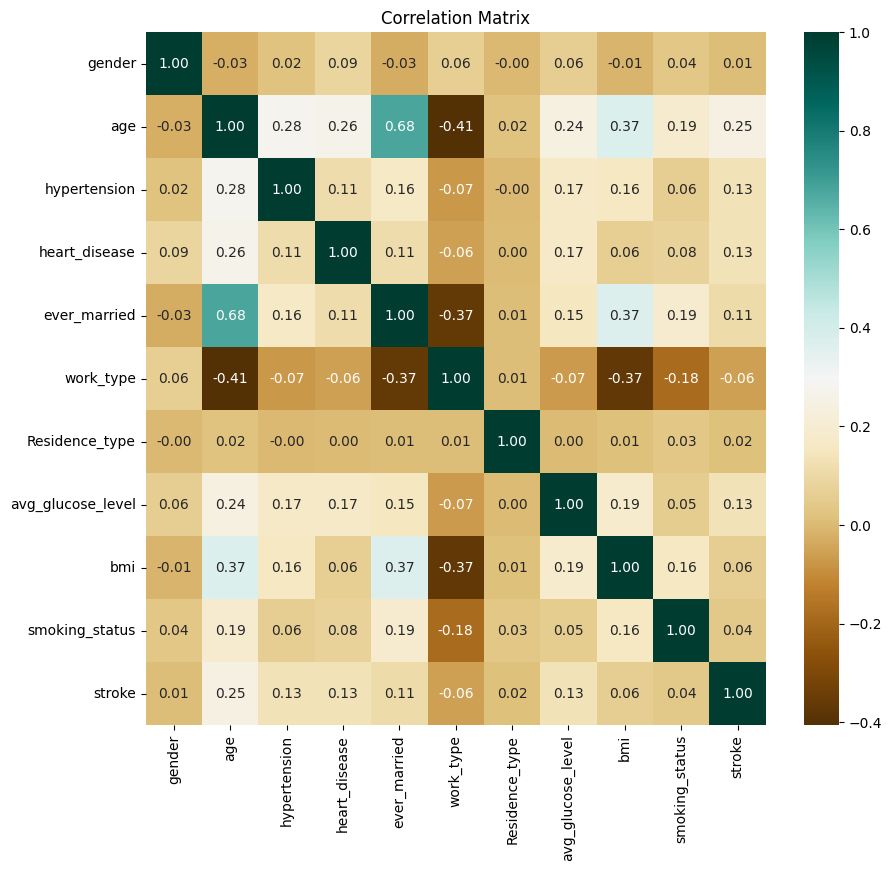

In [18]:
#menghitung dan menampilkan matriks korelasi dari DataFrame df menggunakan heatmap dari Seaborn.
corr_matrix =df.corr()
plt.figure(figsize = (10,9))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'BrBG', annot = True)
plt.title("Correlation Matrix")
plt.show()

Pemisahan Data Training dan Testing

In [21]:
#memisahkan data dan label
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [22]:
#Menyamakan distribusi yang terlalu jauh dari kelas 1 dan 0
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [24]:
X.value_counts()
y.value_counts()

stroke
1    4797
0    4733
Name: count, dtype: int64

In [25]:
#melatih model pada data training dan menguji kinerja model pada data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=42)

Pembuatan Model

In [26]:
#Pembuatan model dengan SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [27]:
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([1, 1, 1, ..., 1, 1, 0])

In [32]:
#Menampilkan performa dari model dengan akurasi, recall, f1-score
from sklearn.metrics import classification_report, accuracy_score, f1_score
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1192
           1       0.74      0.86      0.80      1191

    accuracy                           0.78      2383
   macro avg       0.79      0.78      0.78      2383
weighted avg       0.79      0.78      0.78      2383



Hyper Parameter Tuning

In [33]:
#Meningkatkan performa model dengan hyper parameter tuning menggunakan library GridSearchCV
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   3.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   3.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   3.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   3.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   3.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   2.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   2.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   2.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   2.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   2.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.797 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Hasil setelah model dituning

In [35]:
#Menampilkan performa model setelah dituning
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1192
           1       0.92      0.97      0.95      1191

    accuracy                           0.94      2383
   macro avg       0.95      0.94      0.94      2383
weighted avg       0.95      0.94      0.94      2383



Model Prediksi

In [37]:
#Menguji model
input_data = (1,67,0,1,	1,	0,	1,	228.69,	36.6,	1)

input_data_array = np.array(input_data)

input_data_reshape = input_data_array.reshape(1, -1)

prediction = grid.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0 
    ):
    print('Pasien tidak terkena stroke')
else :
    print('Pasien terkena kanker stroke')

[1]
Pasien terkena kanker stroke


In [38]:

import pickle

In [39]:
#Menyimpan model
filename = 'stroke_model.sav'
pickle.dump(grid, open(filename, 'wb'))